# Load Files

In [2]:
import pandas as pd
from pathlib import Path


/var/folders/h0/rz02629x2b535_x0qf1h70zm0000gn/T/ipykernel_51416/3838270479.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:

directory_path = Path('/Users/yangdong-yeong/Downloads/instacart-market-basket-analysis')

csv_files = directory_path.glob('*.csv')

dataframes = {file.name: pd.read_csv(file) for file in csv_files}



In [4]:
aisles = dataframes['aisles.csv']
departments = dataframes['departments.csv']
order_products__train = dataframes['order_products__train.csv']
sample_submission = dataframes['sample_submission.csv']
order_products__prior = dataframes['order_products__prior.csv']
products = dataframes['products.csv']
orders = dataframes['orders.csv']

# 기술 통계 및 추정
  1. 데이터셋의 전체 구조 파악
  2. 기술적 통계량
  3. 결측,이상치 분석

In [5]:
from IPython.display import display

# 각 데이터프레임의 .head()를 순차적으로 표시
dataframe_names = ['aisles', 'departments', 'order_products__train', 'sample_submission', 'order_products__prior', 'products', 'orders']

# 정의된 데이터프레임 리스트를 순회하며 display 함수로 출력
for name in dataframe_names:
    print(f"{name}.head():")
    display(eval(name).head())
    display(eval(name).info())
    print("\n")  # 데이터프레임 사이에 공백 줄 추가

aisles.head():


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


None



departments.head():


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


None



order_products__train.head():


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


None



sample_submission.head():


,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  75000 non-null  int64 
 1   products  75000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


None



order_products__prior.head():


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


None



products.head():


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None



orders.head():


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


None

In [6]:
# 전체 데이터 분석을 위해 병합
order_products = pd.concat([order_products__train, order_products__prior])
order_products = order_products.merge(products, on='product_id', how='left').merge(orders, on='order_id', how='left').merge(departments, on='department_id').merge(aisles, on='aisle_id')


In [7]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,dairy eggs,yogurt
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0,dairy eggs,other creams cheeses
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0,produce,fresh vegetables
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0,produce,fresh vegetables
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0,canned goods,canned meat seafood


In [8]:
order_products.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.174104e+07
mean,1.710566e+06,2.557551e+04,8.367738e+00,5.900617e-01,7.121799e+01,9.918544e+00,1.029444e+05,1.713998e+01,2.737285e+00,1.343123e+01,1.136415e+01
std,9.874008e+05,1.409770e+04,7.139540e+00,4.918220e-01,3.819898e+01,6.281655e+00,5.946733e+04,1.749829e+01,2.093296e+00,4.246149e+00,8.940500e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.554130e+05,1.351900e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,5.143500e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00
50%,1.710660e+06,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,1.026260e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00
75%,2.565587e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.544120e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


1. reordered : 0과 1로 구분되어 평균값이 0.59로 재구매 비율이 높은 마켓인 것 같습니다.
2. order_dow : 0 ~ 6까지로 구성되어 '일월화수목금토'로 구성된 것으로 보여집니다.
3. order_hour_of_day : 0 ~ 23시 까지로 24시간으로 구성되어 있는 것으로 보여집니다.
4. days_since_prior_order : 0일부터 30일까지로 평균적으로 11일 내 재구매가 되는 것으로 보여집니다.

전체적으로 이상치는 확인되지 않습니다.

# 상관관계
1. 제품
2. 날짜,시간
3. 유저

### 제품 별 상관관계

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# 제품 별 데이터 프레임 생성
df = order_products.groupby('product_name')['reordered'].mean().round(2)
df = df.reset_index()

product_df = df.sort_values('reordered', ascending=False)

In [70]:
# 판매량 추가
product_df['sales_volume'] = order_products.groupby('product_name')['order_id'].transform('count')
# 평균 재구매 주기 추가
product_df['average_days_since_prior_order'] = order_products.groupby('product_name')['days_since_prior_order'].transform('mean').round(2)
# 카트에 담긴 순서 평균 추가
product_df['average_add_to_cart_order'] = order_products.groupby('product_name')['add_to_cart_order'].transform('mean').round(2)

In [71]:
# 데이터프레임 확인
product_df.head()

,product_name,reordered,sales_volume,average_days_since_prior_order,average_add_to_cart_order
37379,Raw Veggie Wrappers,0.94,740,11.16,10.20
39870,Serenity Ultimate Extrema Overnight Pads,0.93,11610,10.73,10.24
8537,Chocolate Love Bar,0.92,4132,11.70,9.84
28415,Orange Energy Shots,0.92,2648,12.00,9.60
13844,"Energy Shot, Grape Flavor",0.91,27679,11.30,8.93


In [12]:
# correlation 확인을 위해 pruduct_name 열 drop
corr = product_df.drop(columns= 'product_name')

### T- Test
  - 판매량이 높을수록 카트에 담기는 순서가 빠를까?

In [57]:
# 'average_add_to_cart_order' 표본추출
# 중심극한정리를 시연하기 위해, 여러 번에 걸쳐서 표본 평균을 계산합니다.
average_add_to_cart_order_means = []
n_samples = 1000  # 표본 추출 횟수
sample_size = 50   # 각 표본의 크기

for _ in range(n_samples):
  sample = product_df['average_add_to_cart_order'].sample(n = sample_size)
  average_add_to_cart_order_means.append(sample.mean())

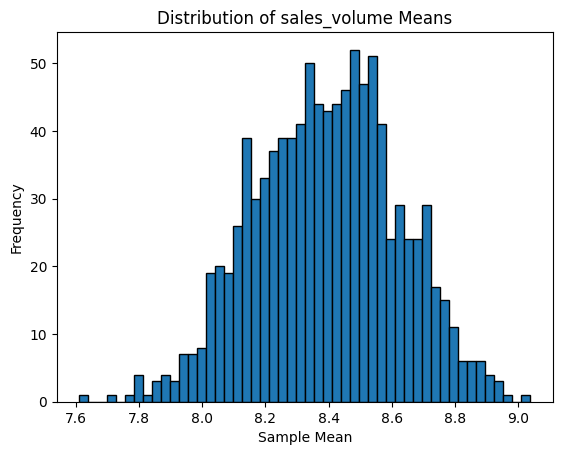

In [58]:
#시각화
plt.hist(average_add_to_cart_order_means, bins=50, edgecolor='black')
plt.title('Distribution of sales_volume Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [59]:
# 'sales_volume' 표본 추출
# 중심극한정리를 시연하기 위해, 여러 번에 걸쳐서 표본 평균을 계산합니다.
sales_volume_means = []
n_samples = 1000  # 표본 추출 횟수
sample_size = 50   # 각 표본의 크기

for _ in range(n_samples):
  sample = product_df['sales_volume'].sample(n = sample_size)
  sales_volume_means.append(sample.mean())

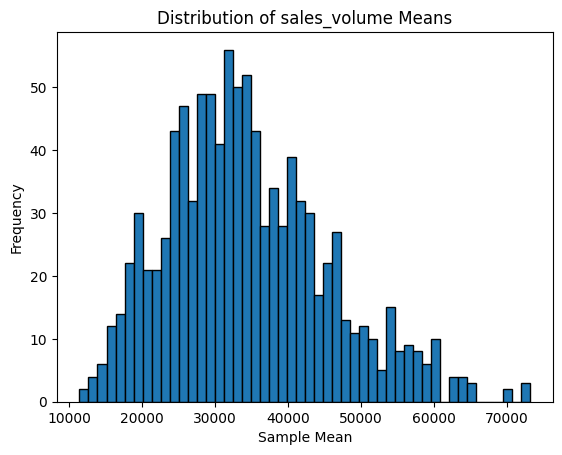

In [60]:
# 시각화
plt.hist(sales_volume_means, bins=50, edgecolor='black')
plt.title('Distribution of sales_volume Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [61]:
from scipy import stats

# 두 표본 간의 t-test 수행
t_stat, p_val = stats.ttest_ind(average_add_to_cart_order_means, sales_volume_means)

print(f't-statistic: {t_stat}, p-value: {p_val}')

t-statistic: -98.13305230541451, p-value: 0.0


t-statistic가 -98로 판매량이 증가함에 따라 카트에 담기는 순서가 빠른 음의 관계에 있으며 p-value가 0.0으로 통계적으로 유의미한 것으로 확인됩니다.

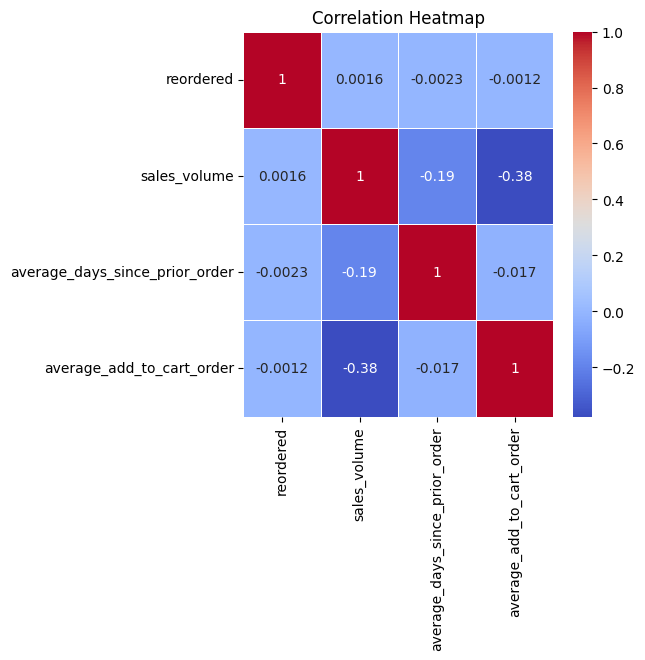

In [18]:
# 피처 간 상관관계 히트맵
correlation_matrix = corr.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

판매량이 높을수록 카트에 담기는 순서가 빠르며 구매주기가 짧아지지만 <br/>
판매량이 높더라도 재구매율과는 상관관계가 적은 것으로 보여집니다.

### 날짜 시간 별 상관관계

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 요일 별 시간 주문량 변수 생성
hwd = pd.crosstab(orders["order_hour_of_day"], orders["order_dow"])
hwd.columns = [w for w in "0123456"]
hwd

,0,1,2,3,4,5,6
order_hour_of_day,,,,,,,
0,3936,3674,3059,2952,2642,3189,3306
1,2398,1830,1572,1495,1512,1672,1919
2,1409,1105,943,953,899,1016,1214
3,963,748,719,654,686,841,863
4,813,809,744,719,730,910,802
5,1168,1607,1399,1355,1330,1574,1136
6,3329,5370,4758,4562,4401,4866,3243
7,12410,16571,13245,12396,12493,13434,11319
8,28108,34116,24635,22553,21814,24015,22960


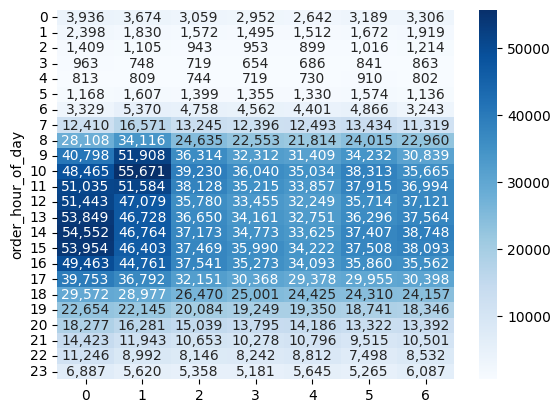

In [20]:
# 시각화
sns.heatmap(hwd, annot=True, fmt=",.0f", cmap="Blues");

주문건은 대부분 8시 ~ 18시에 몰려있으며, 일요일(0), 월요일(1)에 주문이 높은 것으로 확인됩니다.

### 고객 별 상관관계

In [31]:
# 제품 별 데이터 프레임 생성
df = order_products.groupby('user_id')['reordered'].sum()
df = df.reset_index()

user_df = df.sort_values('reordered', ascending=False)

In [32]:
# 유저 당 주문건수 추가
user_df['sales_volume'] = order_products.groupby('user_id')['order_id'].transform('count')
# 평균 재구매 주기 추가
user_df['average_days_since_prior_order'] = order_products.groupby('user_id')['days_since_prior_order'].transform('mean').round(2)
# order 당 평균 제품 수 추가
avg_products_per_order = order_products.groupby(['user_id', 'order_id']).size().groupby(level=0).mean()
user_df['avg_products_per_order'] = user_df['user_id'].map(avg_products_per_order).round(2)


In [33]:
user_df.head()

,user_id,reordered,sales_volume,average_days_since_prior_order,avg_products_per_order
201267,201268,3275,84,16.66,37.63
129927,129928,3199,109,11.65,56.75
164054,164055,2684,51,3.32,30.89
137628,137629,2649,35,25.64,29.31
186703,186704,2553,278,13.59,29.66


In [34]:
# correlation 확인을 위해 user_df 열 drop
corr = user_df.drop(columns= 'user_id')

### 선형 회귀 모델
 - 주문건 당 구매물품 수가 많을 수록 재구매가 많을까?

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 독립 변수와 종속 변수 분리
X = user_df[['avg_products_per_order']]  # 독립 변수는 2차원 배열 형태로
y = user_df['reordered']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X, y)

# 예측 및 성능 평가
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean squared error (MSE): {mse}")
print(f"Coefficient of determination (R^2): {r2}")


Coefficients: [10.12021826]
Intercept: -4.273111428403084
Mean squared error (MSE): 22199.777351149245
Coefficient of determination (R^2): 0.1359883695809967


Coefficients: 물품이 1개 늘어날수록 재구매 회수가 10회 증가합니다. <br/>
Intercept: 주문건 수가 0일 때 예측되는 재구매 회수로 구매 건수가 0일 수 없어 오류값인 것으로 보여집니다.  <br/>
Mean squared error (MSE): MSE 값이 상당히 큰 것으로 확인되어 실제 값과 모델의 예측이 큰 차이가 있어보입니다.<br/>
Coefficient of determination (R^2): 모델이 재주문수의 변동성을 13.6%만 나타내고 있으며, 주문건 당 평균 구매수만으로는 재주문수를 나타내기 어려워 보입니다. <br/>

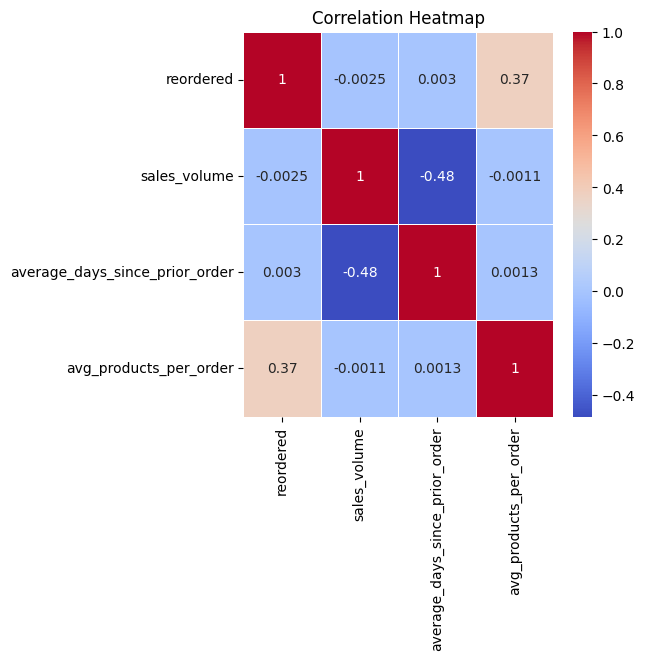

In [35]:
# 피처 간 상관관계 히트맵
correlation_matrix = corr.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

구매량이 높을수록 구매 주기는 짧은 것으로 보여지며, <br/>
재주문 수가 높을수록 한번 주문할 때 여러 물품을 함께 구매하는 것이 상관관계가 있는 것으로 확인됩니다.

# 회고

kaggle 필사를 통해 다른 사람들의 분석된 내용을 따라 작성하며 이해하는 것과 다르게 <br/>
목적이 정해져있지 않은 데이터를 탐색해나가며 방향성을 잡아가다보니 어떻게 데이터를 연결하고 어떤 데이터를 활용해야하는지를 고민하는데 가장 오랜 시간을 소모되었습니다.<br/>
지금까지 배웠던 내용들을 하나씩 적용해보며 돌아볼 수 있었지만 아직 개념을 완벽하게 이해하지는 못해 많은 부분을 적용해보지 못한 아쉬움이 남았습니다.<br/>
구매 물품 예측 모델을 만들어보기 위해 시간을 오래 쏟았지만 최적화가 되지 않아 많은 데이터 양으로 인해 실행할때마다 시간이 오래걸리는 문제가 발생하여 완성하지 못했습니다.<br/>
다음주 머신러닝을 배운 후 다시 한번 도전해 볼 예정입니다.